In [1]:
import os
import numpy
import random
import itertools
import pickle
import matplotlib.pyplot as plt
from matplotlib import cm, colors

In [2]:
#### parameters
result_path = '/Users/hojinjang/Desktop/DeepLearning/RobustFaceRecog/results/'
version = 3

num_categories = 388
category_orders = [i for i in range(num_categories)]
num_categories_transformed = [1, 50, 100, 150, 200, 250, 300, 350, 388]

In [3]:
#### blur
model_formats = [
    'alexnet_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_1_1_discrete_0',
    'alexnet_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_1_50_discrete_0',
    'alexnet_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_1_100_discrete_0',
    'alexnet_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_1_150_discrete_0',
    'alexnet_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_1_200_discrete_0',
    'alexnet_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_1_250_discrete_0',
    'alexnet_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_1_300_discrete_0',
    'alexnet_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_1_350_discrete_0',
    'alexnet_blur_discrete_0-0.5-1-1.5-2-2.5-3-3.5-4_1_388_discrete_0',
]
file_name = 'analysis_v3_accuracy_by_blur.pickle'

params = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4] # blur
blur_acc_within = numpy.zeros((len(model_formats), len(params)))
blur_acc_across = numpy.zeros((len(model_formats), len(params)))

for i, model_format in enumerate(model_formats):
    mf = model_format.split('_')

    model_name = mf[0]
    transformation_type = mf[1]
    transformation_sampling = mf[2]
    transformation_levels = list(map(float, mf[3].split('-')))
    # num_categories_transformed = int(params[4])
    trial = int(mf[5])
    if len(mf) > 6:
        background_sampling = mf[6]
        background_colors = list(map(float, mf[7].split('-')))

    random.seed(trial) # seed fixed
    random.shuffle(category_orders)

    with open(os.path.join(result_path, 'v{}'.format(version), model_format, file_name), 'rb') as f:
        data = pickle.load(f)
    blur_acc_within[i,:] = data['accuracy1_within']
    blur_acc_across[i,:] = data['accuracy1_across']

In [4]:
#### scale
model_formats = [
    'alexnet_scale_discrete_1-0.9-0.8-0.7-0.6-0.5-0.4-0.3-0.2-0.1_1_1_discrete_0',
    'alexnet_scale_discrete_1-0.9-0.8-0.7-0.6-0.5-0.4-0.3-0.2-0.1_50_1_discrete_0',
    'alexnet_scale_discrete_1-0.9-0.8-0.7-0.6-0.5-0.4-0.3-0.2-0.1_100_1_discrete_0',
    'alexnet_scale_discrete_1-0.9-0.8-0.7-0.6-0.5-0.4-0.3-0.2-0.1_150_1_discrete_0',
    'alexnet_scale_discrete_1-0.9-0.8-0.7-0.6-0.5-0.4-0.3-0.2-0.1_200_1_discrete_0',
    'alexnet_scale_discrete_1-0.9-0.8-0.7-0.6-0.5-0.4-0.3-0.2-0.1_250_1_discrete_0',
    'alexnet_scale_discrete_1-0.9-0.8-0.7-0.6-0.5-0.4-0.3-0.2-0.1_300_1_discrete_0',
    'alexnet_scale_discrete_1-0.9-0.8-0.7-0.6-0.5-0.4-0.3-0.2-0.1_350_1_discrete_0',
    'alexnet_scale_discrete_1-0.9-0.8-0.7-0.6-0.5-0.4-0.3-0.2-0.1_388_1_discrete_0',
]
file_name = 'analysis_v3_accuracy_by_scale.pickle'

params = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.] # scale
scale_acc_within = numpy.zeros((len(model_formats), len(params)))
scale_acc_across = numpy.zeros((len(model_formats), len(params)))

for i, model_format in enumerate(model_formats):
    mf = model_format.split('_')

    model_name = mf[0]
    transformation_type = mf[1]
    transformation_sampling = mf[2]
    transformation_levels = list(map(float, mf[3].split('-')))
    # num_categories_transformed = int(params[4])
    trial = int(mf[5])
    if len(mf) > 6:
        background_sampling = mf[6]
        background_colors = list(map(float, mf[7].split('-')))

    random.seed(trial) # seed fixed
    random.shuffle(category_orders)

    with open(os.path.join(result_path, 'v{}'.format(version), model_format, file_name), 'rb') as f:
        data = pickle.load(f)
    scale_acc_within[i,:] = data['accuracy1_within']
    scale_acc_across[i,:] = data['accuracy1_across']

In [5]:
#### rotate
model_formats = [
    'alexnet_rotate_discrete_0-45-90-135-180-225-270-315_1_1_discrete_0',
    'alexnet_rotate_discrete_0-45-90-135-180-225-270-315_50_1_discrete_0',
    'alexnet_rotate_discrete_0-45-90-135-180-225-270-315_100_1_discrete_0',
    'alexnet_rotate_discrete_0-45-90-135-180-225-270-315_150_1_discrete_0',
    'alexnet_rotate_discrete_0-45-90-135-180-225-270-315_200_1_discrete_0',
    'alexnet_rotate_discrete_0-45-90-135-180-225-270-315_250_1_discrete_0',
    'alexnet_rotate_discrete_0-45-90-135-180-225-270-315_300_1_discrete_0',
    'alexnet_rotate_discrete_0-45-90-135-180-225-270-315_350_1_discrete_0',
    'alexnet_rotate_discrete_0-45-90-135-180-225-270-315_388_1_discrete_0',
]
file_name = 'analysis_v3_accuracy_by_rotate.pickle'

params = [0, 45, 90, 135, 180, 225, 270, 315] # rotate
rotate_acc_within = numpy.zeros((len(model_formats), len(params)))
rotate_acc_across = numpy.zeros((len(model_formats), len(params)))

for i, model_format in enumerate(model_formats):
    mf = model_format.split('_')

    model_name = mf[0]
    transformation_type = mf[1]
    transformation_sampling = mf[2]
    transformation_levels = list(map(float, mf[3].split('-')))
    # num_categories_transformed = int(params[4])
    trial = int(mf[5])
    if len(mf) > 6:
        background_sampling = mf[6]
        background_colors = list(map(float, mf[7].split('-')))

    random.seed(trial) # seed fixed
    random.shuffle(category_orders)

    with open(os.path.join(result_path, 'v{}'.format(version), model_format, file_name), 'rb') as f:
        data = pickle.load(f)
    rotate_acc_within[i,:] = data['accuracy1_within']
    rotate_acc_across[i,:] = data['accuracy1_across']

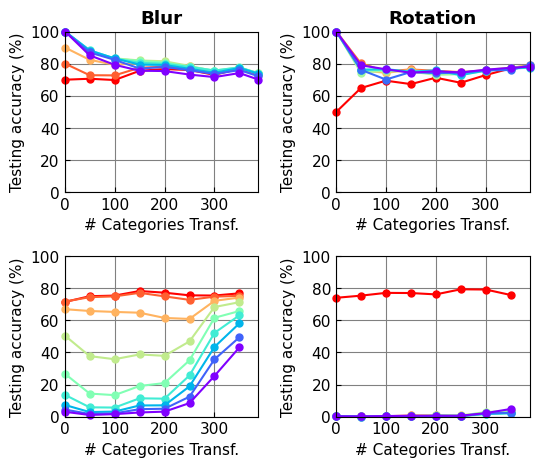

In [16]:
plt.figure(figsize=(6,5))
plt.rcParams['font.size'] = '11'
# plt.rcParams["axes.spines.right"] = False
# plt.rcParams["axes.spines.top"] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
margin = 0.4

#### blur
cmap = cm.rainbow(numpy.linspace(0, 1, 9))
plt.subplot(2,2, 1)
plt.subplots_adjust(wspace=margin, hspace=margin)
for i in range(9):
    plt.plot(num_categories_transformed, blur_acc_within[:,i] * 100, '.-', markersize=10, color=cmap[8-i], clip_on=False)
plt.xlabel('# Categories Transf.')
plt.ylabel('Testing accuracy (%)')
plt.xlim([0,388])
plt.ylim(0,100)
plt.grid(color='gray')
plt.title('Blur', fontweight='bold')

plt.subplot(2,2, 3)
plt.subplots_adjust(wspace=margin, hspace=margin)
for i in range(9):
    plt.plot(num_categories_transformed[:-1], blur_acc_across[:-1,i] * 100, '.-', markersize=10, color=cmap[8-i], clip_on=False)
plt.xlabel('# Categories Transf.')
plt.ylabel('Testing accuracy (%)')
plt.xlim([0,388])
plt.ylim(0,100)
plt.grid(color='gray')
# plt.colorbar(cm.ScalarMappable(cmap=plt.get_cmap('rainbow', 9), norm=colors.BoundaryNorm(numpy.arange(0,10),10)))

#### scale
# cmap = cm.rainbow(numpy.linspace(0, 1, 10))
# plt.subplot(2,3, 2)
# plt.subplots_adjust(wspace=margin, hspace=margin)
# for i in range(10):
#     plt.plot(num_categories_transformed, scale_acc_within[:,i] * 100, '.-', markersize=10, color=cmap[i], clip_on=False)
# plt.xlabel('# Categories Transf.')
# plt.ylabel('Testing accuracy (%)')
# plt.xlim([0,388])
# plt.ylim(0,100)
# plt.grid(color='gray')
# plt.title('Scale')
#
# plt.subplot(2,3, 5)
# plt.subplots_adjust(wspace=margin, hspace=margin)
# for i in range(10):
#     plt.plot(num_categories_transformed[:-1], scale_acc_across[:-1,i] * 100, '.-', markersize=10, color=cmap[i], clip_on=False)
# plt.xlabel('# Categories Transf.')
# plt.ylabel('Testing accuracy (%)')
# plt.xlim([0,388])
# plt.ylim(0,100)
# plt.grid(color='gray')

#### rotate
cmap = cm.rainbow(numpy.linspace(0, 1, 8))
plt.subplot(2,2, 2)
plt.subplots_adjust(wspace=margin, hspace=margin)
for i in range(8):
    plt.plot(num_categories_transformed, rotate_acc_within[:,i] * 100, '.-', markersize=10, color=cmap[7-i], clip_on=False)
plt.xlabel('# Categories Transf.')
plt.ylabel('Testing accuracy (%)')
plt.xlim([0,388])
plt.ylim(0,100)
plt.grid(color='gray')
plt.title('Rotation', fontweight='bold')

plt.subplot(2,2, 4)
plt.subplots_adjust(wspace=margin, hspace=margin)
for i in range(8):
    plt.plot(num_categories_transformed[:-1], rotate_acc_across[:-1,i] * 100, '.-', markersize=10, color=cmap[7-i], clip_on=False)
plt.xlabel('# Categories Transf.')
plt.ylabel('Testing accuracy (%)')
plt.xlim([0,388])
plt.ylim(0,100)
plt.grid(color='gray')
# plt.colorbar(cm.ScalarMappable(cmap=plt.get_cmap('rainbow', 8), norm=colors.BoundaryNorm(numpy.arange(0,9),9)))
